In [107]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
# create dataframes from csv files in the 'data' directory
four = pd.read_csv('data/4GHz.csv')
ten = pd.read_csv('data/10GHz.csv')
twenty = pd.read_csv('data/20GHz.csv')
fifty = pd.read_csv('data/50GHz.csv')
hundred = pd.read_csv('data/100GHz.csv')

# renamed Unnamed: 0 to 'benchmark' for clarity
four = four.rename(columns={'Unnamed: 0': 'Benchmark'})
ten = ten.rename(columns={'Unnamed: 0': 'Benchmark'})
twenty = twenty.rename(columns={'Unnamed: 0': 'Benchmark'})
fifty = fifty.rename(columns={'Unnamed: 0': 'Benchmark'})
hundred = hundred.rename(columns={'Unnamed: 0': 'Benchmark'})

# add suffixes to column names with lambda function except for 'Benchmark'
suffix_function = lambda col, suffix: col + '_' + suffix if col != 'Benchmark' else col

suffix_four = 'four'
suffix_ten = 'ten'
suffix_twenty = 'twenty'
suffix_fifty = 'fifty'
suffix_hundred = 'hundred'

four = four.rename(columns=lambda col: suffix_function(col, suffix_four))
ten = ten.rename(columns=lambda col: suffix_function(col, suffix_ten))
twenty = twenty.rename(columns=lambda col: suffix_function(col, suffix_twenty))
fifty = fifty.rename(columns=lambda col: suffix_function(col, suffix_fifty))
hundred = hundred.rename(columns=lambda col: suffix_function(col, suffix_hundred))

# merge dataframes on 'Benchmark' column
merged = pd.merge(four, ten, on='Benchmark')
merged = pd.merge(merged, twenty, on='Benchmark')
merged = pd.merge(merged, fifty, on='Benchmark')
merged = pd.merge(merged, hundred, on='Benchmark')

merged['Speedup_10GHz'] = merged['Seconds_four'] / merged['Seconds_ten']
merged['Speedup_20GHz'] = merged['Seconds_four'] / merged['Seconds_twenty']
merged['Speedup_50GHz'] = merged['Seconds_four'] / merged['Seconds_fifty']
merged['Speedup_100GHz'] = merged['Seconds_four'] / merged['Seconds_hundred']

merged['l1dBandwidth_4GHz'] = 8*merged['l1dAccesses_four'] / merged['Seconds_four']
merged['l1iBandwidth_4GHz'] = 8*merged['l1iAccesses_four'] / merged['Seconds_four']
merged['l2Bandwidth_4GHz'] = 64*merged['l2Accesses_four'] / merged['Seconds_four']
merged['l3Bandwidth_4GHz'] = 64*merged['l3Accesses_four'] / merged['Seconds_four']

merged['l1dBandwidth_10GHz'] = 8*merged['l1dAccesses_ten'] / merged['Seconds_ten']
merged['l1iBandwidth_10GHz'] = 8*merged['l1iAccesses_ten'] / merged['Seconds_ten']
merged['l2Bandwidth_10GHz'] = 64*merged['l2Accesses_ten'] / merged['Seconds_ten']
merged['l3Bandwidth_10GHz'] = 64*merged['l3Accesses_ten'] / merged['Seconds_ten']

merged['l1dBandwidth_20GHz'] = 8*merged['l1dAccesses_twenty'] / merged['Seconds_twenty']
merged['l1iBandwidth_20GHz'] = 8*merged['l1iAccesses_twenty'] / merged['Seconds_twenty']
merged['l2Bandwidth_20GHz'] = 64*merged['l2Accesses_twenty'] / merged['Seconds_twenty']
merged['l3Bandwidth_20GHz'] = 64*merged['l3Accesses_twenty'] / merged['Seconds_twenty']

merged['l1dBandwidth_50GHz'] = 8*merged['l1dAccesses_fifty'] / merged['Seconds_fifty']
merged['l1iBandwidth_50GHz'] = 8*merged['l1iAccesses_fifty'] / merged['Seconds_fifty']
merged['l2Bandwidth_50GHz'] = 64*merged['l2Accesses_fifty'] / merged['Seconds_fifty']
merged['l3Bandwidth_50GHz'] = 64*merged['l3Accesses_fifty'] / merged['Seconds_fifty']

merged['l1dBandwidth_100GHz'] = 8*merged['l1dAccesses_hundred'] / merged['Seconds_hundred']
merged['l1iBandwidth_100GHz'] = 8*merged['l1iAccesses_hundred'] / merged['Seconds_hundred']
merged['l2Bandwidth_100GHz'] = 64*merged['l2Accesses_hundred'] / merged['Seconds_hundred']
merged['l3Bandwidth_100GHz'] = 64*merged['l3Accesses_hundred'] / merged['Seconds_hundred']

merged['Relative_Cycles_four'] = merged['Cycles_four'] / merged['Cycles_four']
merged['Relative_Cycles_ten'] = merged['Cycles_ten'] / merged['Cycles_four']
merged['Relative_Cycles_twenty'] = merged['Cycles_twenty'] / merged['Cycles_four']
merged['Relative_Cycles_fifty'] = merged['Cycles_fifty'] / merged['Cycles_four']
merged['Relative_Cycles_hundred'] = merged['Cycles_hundred'] / merged['Cycles_four']

merged['Total Cache Bandwidth_4GHz'] = merged['l1dBandwidth_4GHz'] + merged['l1iBandwidth_4GHz'] + merged['l2Bandwidth_4GHz'] + merged['l3Bandwidth_4GHz']
merged['Total Cache Bandwidth_10GHz'] = merged['l1dBandwidth_10GHz'] + merged['l1iBandwidth_10GHz'] + merged['l2Bandwidth_10GHz'] + merged['l3Bandwidth_10GHz']
merged['Total Cache Bandwidth_20GHz'] = merged['l1dBandwidth_20GHz'] + merged['l1iBandwidth_20GHz'] + merged['l2Bandwidth_20GHz'] + merged['l3Bandwidth_20GHz']
merged['Total Cache Bandwidth_50GHz'] = merged['l1dBandwidth_50GHz'] + merged['l1iBandwidth_50GHz'] + merged['l2Bandwidth_50GHz'] + merged['l3Bandwidth_50GHz']
merged['Total Cache Bandwidth_100GHz'] = merged['l1dBandwidth_100GHz'] + merged['l1iBandwidth_100GHz'] + merged['l2Bandwidth_100GHz'] + merged['l3Bandwidth_100GHz']



In [109]:
def plot(stat, title= None):
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')
    # plot the bar plot for each benchmark for _default, _cryocache, _cryocore, and _cryoall
    # separate bars for each configuration
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged['Benchmark']))*1.15
    opacity = 0.8

    plt.bar(index, merged_sorted[stat + '_four'], bar_width, label='4GHz')
    plt.bar(index + bar_width, merged_sorted[stat + '_ten'], bar_width, label='10GHz')
    plt.bar(index + 2*bar_width, merged_sorted[stat + '_twenty'], bar_width, label='20GHz')
    plt.bar(index + 3*bar_width, merged_sorted[stat + '_fifty'], bar_width, label='50GHz')
    plt.bar(index + 4*bar_width, merged_sorted[stat + '_hundred'], bar_width, label='100GHz')

    # plt.bar(index, merged[stat + '_four'], bar_width, alpha=opacity, color='b', label='4GHz')
    # plt.bar(index + bar_width, merged[stat + '_ten'], bar_width, alpha=opacity, color='r', label='10GHz')
    # plt.bar(index + 2*bar_width, merged[stat + '_twenty'], bar_width, alpha=opacity, color='g', label='20GHz')
    # plt.bar(index + 3*bar_width, merged[stat + '_fifty'], bar_width, alpha=opacity, color='y', label='50GHz')
    # plt.bar(index + 4*bar_width, merged[stat + '_hundred'], bar_width, alpha=opacity, color='m', label='100GHz')

    plt.xlabel('Benchmark')
    if title:
        plt.ylabel(title)
    else:
        plt.ylabel(stat)
    # if title:
    #     plt.title(title + ' by benchmark and configuration')
    # else:
    #     plt.title(stat + ' by benchmark and configuration')
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]
    plt.xticks(index + 2*bar_width, labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [110]:
def speedup():
    # Sort the merged DataFrame by the third part of the split Benchmark column
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')

    # print speedup for each benchmark
    print(merged_sorted[['Benchmark', 'Speedup_10GHz', 'Speedup_20GHz', 'Speedup_50GHz', 'Speedup_100GHz']])
    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]
    speedup_10GHz = merged_sorted['Speedup_10GHz']
    speedup_20GHz = merged_sorted['Speedup_20GHz']
    speedup_50GHz = merged_sorted['Speedup_50GHz']
    speedup_100GHz = merged_sorted['Speedup_100GHz']

    # Plot the bars
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    positions = range(len(labels))
    plt.bar(positions, speedup_10GHz, width=bar_width, label='10GHz')
    plt.bar([pos + bar_width for pos in positions], speedup_20GHz, width=bar_width, label='20GHz')
    plt.bar([pos + 2 * bar_width for pos in positions], speedup_50GHz, width=bar_width, label='50GHz')
    plt.bar([pos + 3 * bar_width for pos in positions], speedup_100GHz, width=bar_width, label='100GHz')

    # Set x-axis ticks and labels
    plt.xlabel('Benchmark')
    plt.xticks([pos + 1.5 * bar_width for pos in positions], labels, rotation=45)

    # Set y-axis limits
    plt.ylim(0, 5)

    # Set labels and title
    plt.ylabel('Speedup')
    plt.rcParams.update({'font.size': 12})

    # Display legend
    plt.legend()
    plt.show()

    # Print average speedup
    print('Average speedup for 10GHz:', speedup_10GHz.mean())
    print('Average speedup for 20GHz:', speedup_20GHz.mean())
    print('Average speedup for 50GHz:', speedup_50GHz.mean())
    print('Average speedup for 100GHz:', speedup_100GHz.mean())


In [111]:
def bandwidth(stat):
    # Sort the merged DataFrame by the third part of the split Benchmark column
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')

    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]

    # print maximum value of each bandwidth
    print('Maximum value of each bandwidth')
    print('4GHz:', merged_sorted[stat + '_4GHz'].max() * 10e-9)
    print('10GHz:', merged_sorted[stat + '_10GHz'].max() * 10e-9)
    print('20GHz:', merged_sorted[stat + '_20GHz'].max() * 10e-9)
    print('50GHz:', merged_sorted[stat + '_50GHz'].max() * 10e-9)
    print('100GHz:', merged_sorted[stat + '_100GHz'].max() * 10e-9)
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged_sorted['Benchmark']))*1.15
    opacity = 0.8

    plt.bar(index, 10e-9*merged_sorted[(stat + '_4GHz')], bar_width, label='4GHz')
    plt.bar(index + bar_width, 10e-9*merged_sorted[stat + '_10GHz'], bar_width, label='10GHz')
    plt.bar(index + 2*bar_width, 10e-9*merged_sorted[stat + '_20GHz'], bar_width, label='20GHz')
    plt.bar(index + 3*bar_width, 10e-9*merged_sorted[stat + '_50GHz'], bar_width, label='50GHz')
    plt.bar(index + 4*bar_width, 10e-9*merged_sorted[stat + '_100GHz'], bar_width, label='100GHz')

    plt.xlabel('Benchmark')
    plt.ylabel(stat + ' (GB/s)')
    # plt.title(stat + ' by benchmark and configuration')
    plt.xticks(index + 2*bar_width, labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

                 Benchmark  Speedup_10GHz  Speedup_20GHz  Speedup_50GHz  \
3      riscv-gapbs-bfs-run       1.405270       1.669185       1.753401   
1  riscv-npb-bt-size-s-run       1.779252       2.373350       2.434517   
6  riscv-npb-cg-size-s-run       1.714022       2.290997       2.575935   
4  riscv-npb-ft-size-s-run       1.343853       1.577050       1.617283   
2  riscv-npb-is-size-s-run       1.613595       2.067816       2.011945   
0  riscv-npb-lu-size-s-run       1.661606       2.127279       2.271459   
7   riscv-llvm-minisat-run       1.431222       1.717813       1.788237   
5       riscv-gapbs-tc-run       1.408264       1.656971       1.724697   

   Speedup_100GHz  
3        1.828014  
1        2.455571  
6        2.726600  
4        1.635941  
2        2.136515  
0        2.292969  
7        1.824779  
5        1.790123  


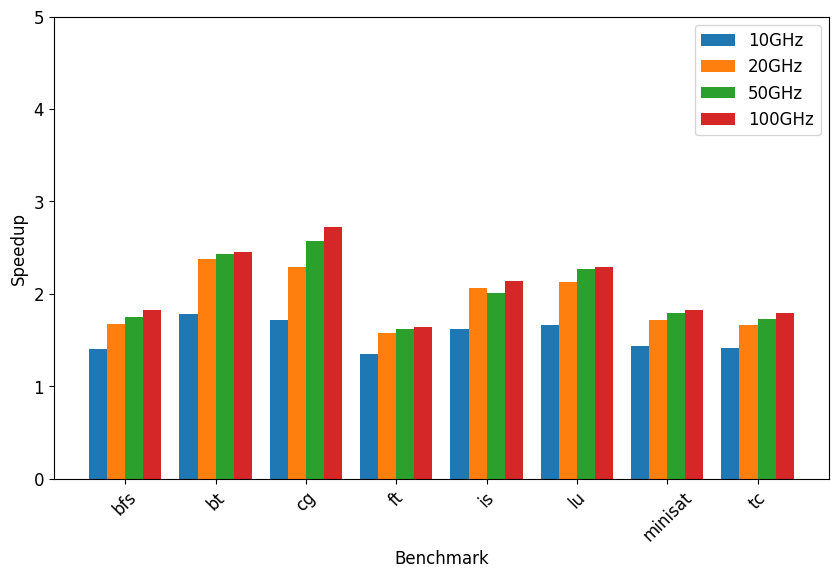

Average speedup for 10GHz: 1.544635404760586
Average speedup for 20GHz: 1.9350576218315427
Average speedup for 50GHz: 2.022184311024428
Average speedup for 100GHz: 2.086313910747118


In [112]:
speedup()

Maximum value of each bandwidth
4GHz: 319.5668410429625
10GHz: 569.8932786104291
20GHz: 761.438302864405
50GHz: 782.7329041315685
100GHz: 789.4917473322208


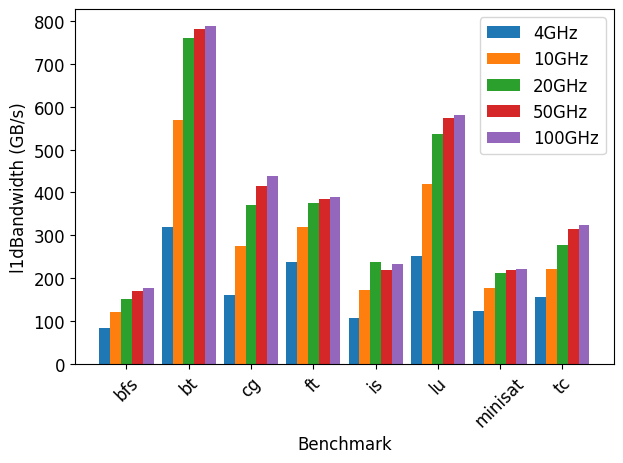

In [113]:
bandwidth('l1dBandwidth')

Maximum value of each bandwidth
4GHz: 133.71879122257053
10GHz: 156.40210489140034
20GHz: 179.5308539372533
50GHz: 186.425276816609
100GHz: 194.6016430976431


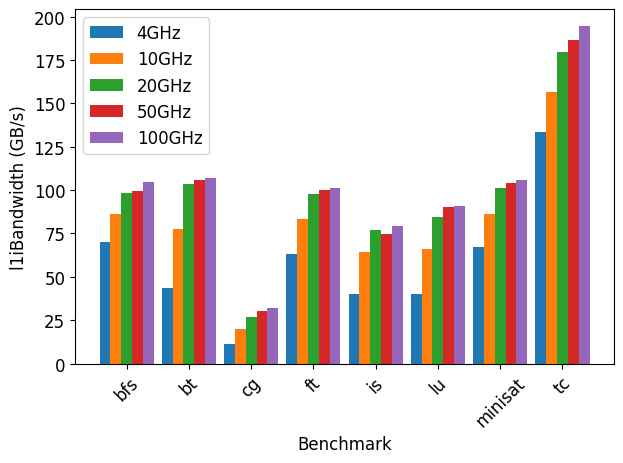

In [114]:
bandwidth('l1iBandwidth')

Maximum value of each bandwidth
4GHz: 239.51119498650982
10GHz: 330.11814376426804
20GHz: 385.97918908575156
50GHz: 390.2837142725216
100GHz: 393.51659971975715


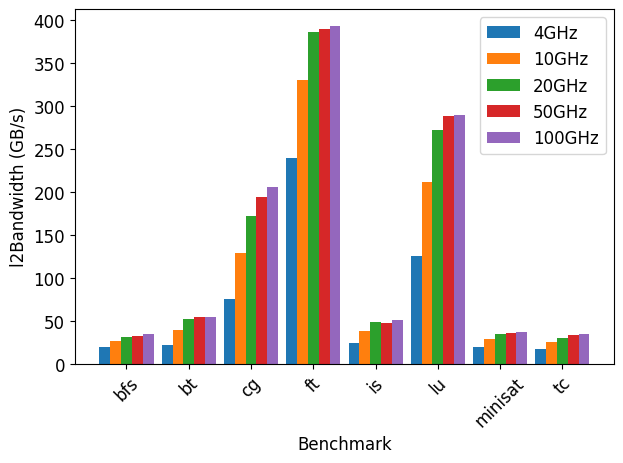

In [115]:
bandwidth('l2Bandwidth')

Maximum value of each bandwidth
4GHz: 71.07021229355605
10GHz: 121.78920843091333
20GHz: 162.7567054036076
50GHz: 183.0198398592169
100GHz: 193.70699450498276


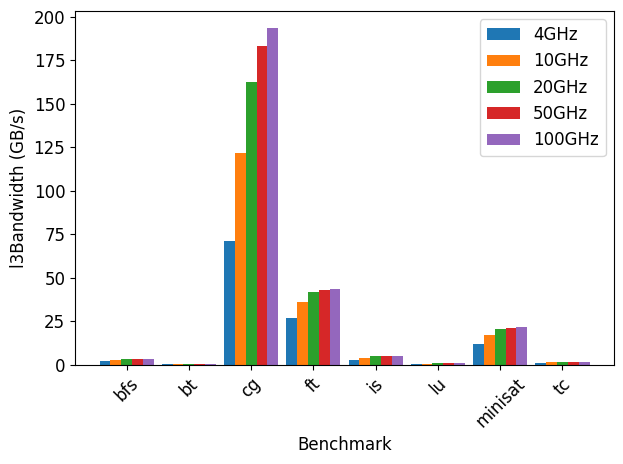

In [116]:
bandwidth('l3Bandwidth')

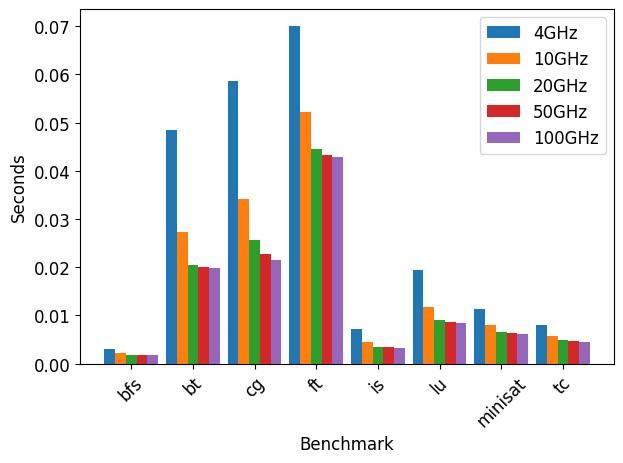

In [117]:
plot('Seconds')

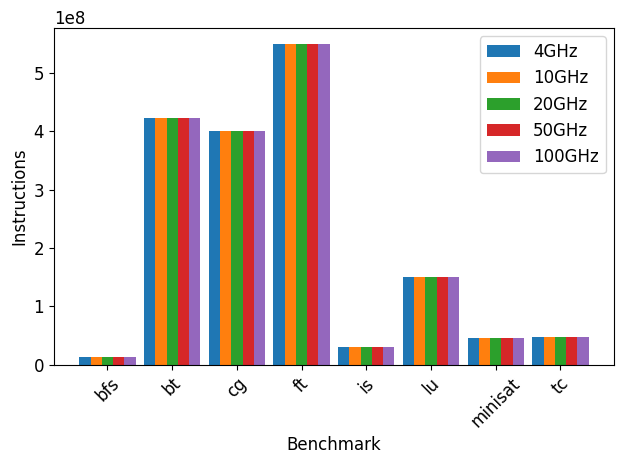

In [118]:
plot('Instructions')

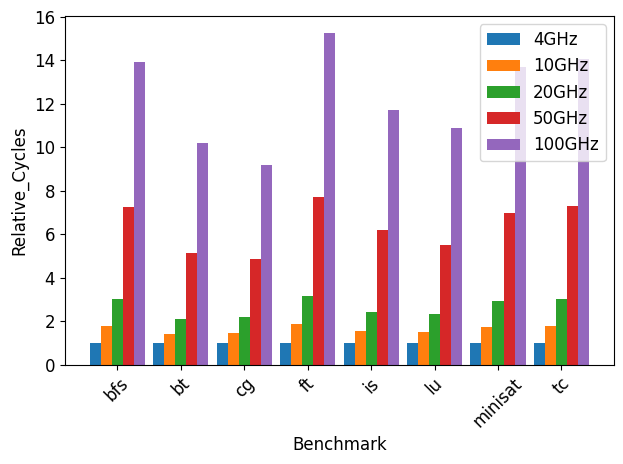

In [119]:
plot('Relative_Cycles')

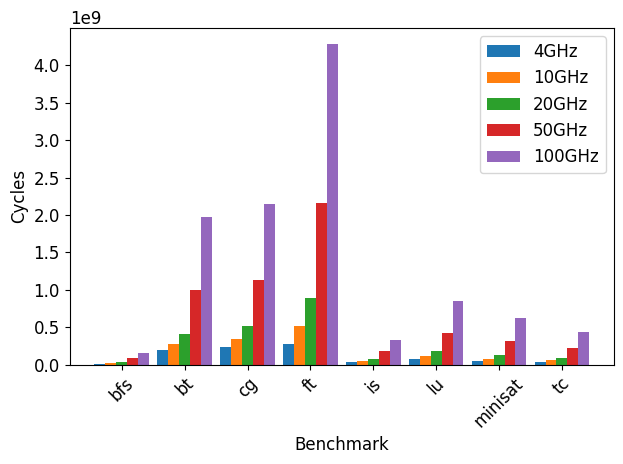

In [120]:
plot('Cycles')

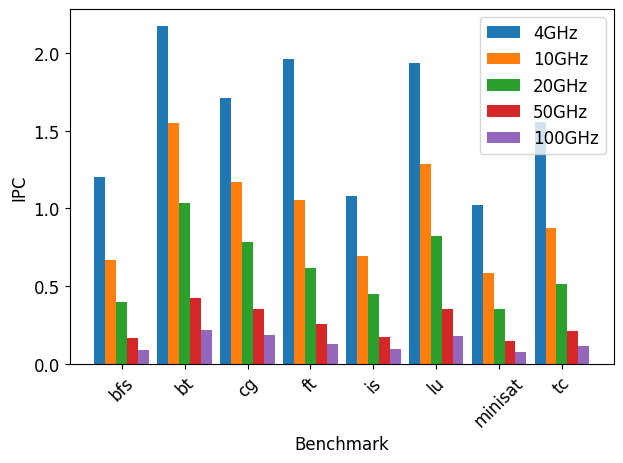

In [121]:
plot('IPC')

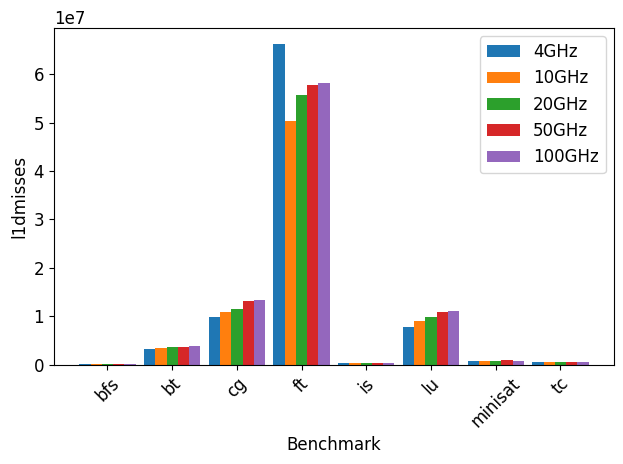

In [122]:
plot('l1dmisses')

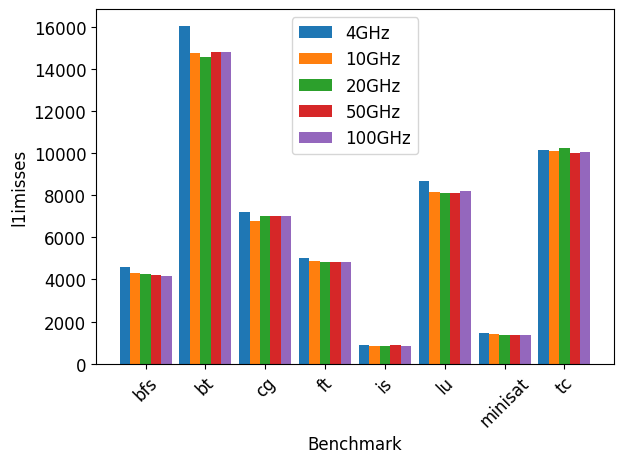

In [123]:
plot('l1imisses')

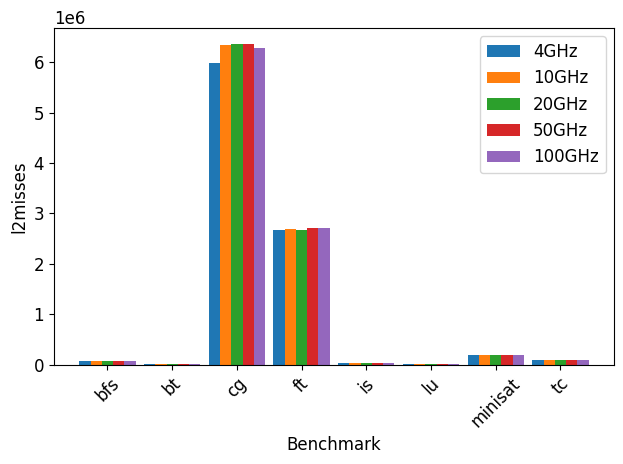

In [124]:
plot('l2misses')

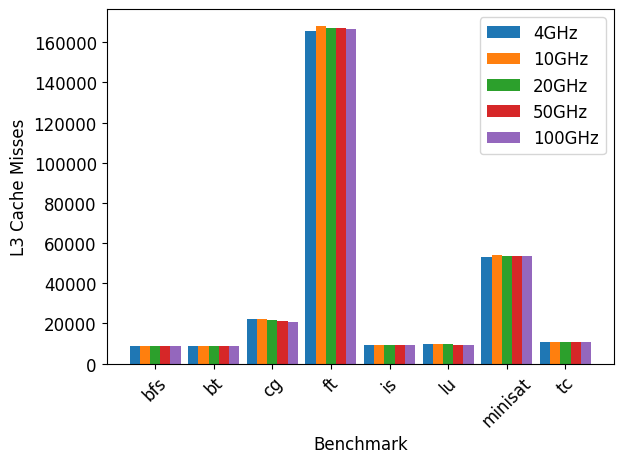

In [125]:
plot('l3misses', 'L3 Cache Misses')

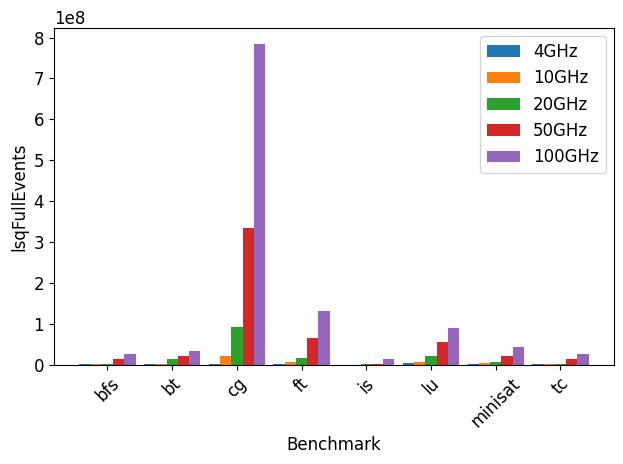

In [126]:
plot('lsqFullEvents')

Maximum value of each bandwidth
4GHz: 566.5209541619677
10GHz: 768.5858783356035
20GHz: 917.5531058754522
50GHz: 953.2231425891181
100GHz: 961.2492708333333


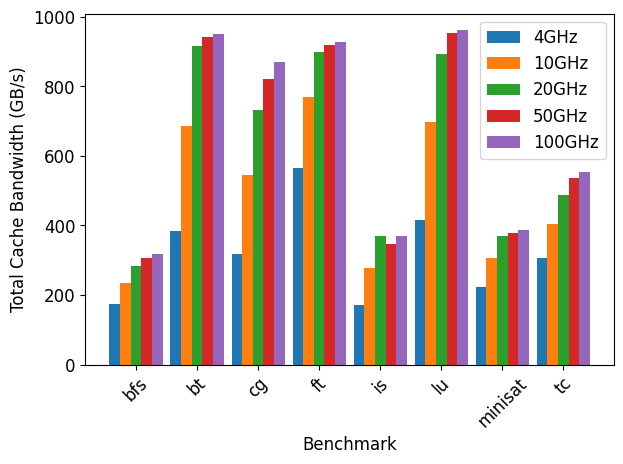

In [127]:
bandwidth('Total Cache Bandwidth')